In [4]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
import scipy as sc
from itertools import product

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (4, 3.5),
    "text.latex.preamble": "\n".join([
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=FR]{siunitx}",
    ]),
    'lines.markersize': 10,
    'lines.color': 'grey',
    'scatter.marker': '+',
    'errorbar.capsize': 3,
    'savefig.bbox': 'tight',
})

In [5]:
path = '../'
executable = 'bin/ex1'
export_path = path + 'rapport/figures/'
# config_file = 'bin/configuration.in.example'

In [6]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [7]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    # print(f"Running with config file {config_file}")
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)
    # print("Done")

In [8]:
nsteps = np.array([*range(100, 4001, 100)]) # TODO change
nsimul = len(nsteps)  # Number of simulations to perform

m = 0.056
v0 = 5
omega = 62.831853072
mu = 6
rho = 1.2
R = 0.033

tfin = 60
dt = tfin / nsteps

In [9]:
alpha = mu * omega * R**3 * rho / m
x_th  = lambda t: v0 / alpha * np.sin(alpha * t)
y_th  = lambda t: v0 / alpha - v0 / alpha * np.cos(alpha * t)
vx_th = lambda t: v0 * np.cos(alpha * t)
vy_th = lambda t: v0 * np.sin(alpha * t)

In [10]:
%%bash
cd .. && make clean && make

rm: cannot remove 'data/*.log': No such file or directory


clang++ -o bin/ex1 src/Exercice1_student.cpp -std=c++17 -Wall -Wextra -O2 


In [11]:
params_variations = {
    'nsteps': nsteps,
    'alpha': [0, 0.5, 1],
}
config_name = "nograv"
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"data/{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'bin/{config_name}.conf', output_file, params)

Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=100,alpha=0.out' nsteps=100 alpha=0`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=100,alpha=0.5.out' nsteps=100 alpha=0.5`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=100,alpha=1.out' nsteps=100 alpha=1`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=200,alpha=0.out' nsteps=200 alpha=0`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=200,alpha=0.5.out' nsteps=200 alpha=0.5`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=200,alpha=1.out' nsteps=200 alpha=1`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=300,alpha=0.out' nsteps=300 alpha=0`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=300,alpha=0.5.out' nsteps=300 alpha=0.5`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps

In [12]:
# Filter stuff
explicit = []
implicit = []
semi_implicit = []

for file, params in zip(outputs, all_params):
    match params:
        case {'alpha': 1}: explicit.append((file, params))
        case {'alpha': 0.5}: semi_implicit.append((file, params))
        case {'alpha': 0}: implicit.append((file, params))
        case _: print("Feur alert")

print(semi_implicit)

[('data/nograv,nsteps=100,alpha=0.5.out', {'nsteps': 100, 'alpha': 0.5}), ('data/nograv,nsteps=200,alpha=0.5.out', {'nsteps': 200, 'alpha': 0.5}), ('data/nograv,nsteps=300,alpha=0.5.out', {'nsteps': 300, 'alpha': 0.5}), ('data/nograv,nsteps=400,alpha=0.5.out', {'nsteps': 400, 'alpha': 0.5}), ('data/nograv,nsteps=500,alpha=0.5.out', {'nsteps': 500, 'alpha': 0.5}), ('data/nograv,nsteps=600,alpha=0.5.out', {'nsteps': 600, 'alpha': 0.5}), ('data/nograv,nsteps=700,alpha=0.5.out', {'nsteps': 700, 'alpha': 0.5}), ('data/nograv,nsteps=800,alpha=0.5.out', {'nsteps': 800, 'alpha': 0.5}), ('data/nograv,nsteps=900,alpha=0.5.out', {'nsteps': 900, 'alpha': 0.5}), ('data/nograv,nsteps=1000,alpha=0.5.out', {'nsteps': 1000, 'alpha': 0.5}), ('data/nograv,nsteps=1100,alpha=0.5.out', {'nsteps': 1100, 'alpha': 0.5}), ('data/nograv,nsteps=1200,alpha=0.5.out', {'nsteps': 1200, 'alpha': 0.5}), ('data/nograv,nsteps=1300,alpha=0.5.out', {'nsteps': 1300, 'alpha': 0.5}), ('data/nograv,nsteps=1400,alpha=0.5.out', 

# Plots!

19


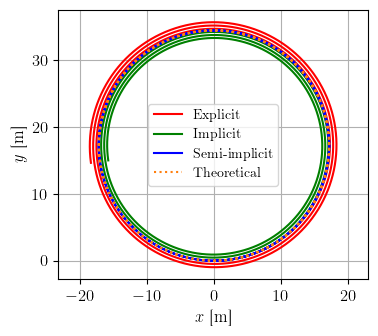

In [13]:
i = np.where(nsteps == 2000)[0][0]
print(i)
data = np.loadtxt(path + explicit[i][0])
xx1, yy1 = data[:, 1], data[:, 2]
data = np.loadtxt(path + implicit[i][0])
xx2, yy2 = data[:, 1], data[:, 2]
data = np.loadtxt(path + semi_implicit[i][0])
xx3, yy3 = data[:, 1], data[:, 2]
xx_th, yy_th = x_th(data[:,0]), y_th(data[:,0])
plt.plot(xx1, yy1, c='r', label='Explicit')
plt.plot(xx2, yy2, c='g', label='Implicit')
plt.plot(xx3, yy3, c='b', label='Semi-implicit')
plt.plot(xx_th, yy_th, c='tab:orange', ls=':', label='Theoretical')


# inset axes....
# x1, x2, y1, y2 = 38.5, 40.5, 208, 210
# axins = plt.gca().inset_axes(
#     [0.3, 0.3, 0.3, 0.3],
#     xlim=(x1, x2), ylim=(y1, y2)
# )
# axins.plot(xx1, yy1, c='r', label='Explicit')
# axins.plot(xx2, yy2, c='g', label='Implicit')
# axins.plot(xx3, yy3, c='b', label='Semi-implicit')
# axins.plot(xx_th, yy_th, c='tab:orange', ls='--', label='Theoretical')
# axins.grid()

# plt.gca().indicate_inset_zoom(axins, edgecolor="black")

plt.axis('equal')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$y$ [m]')
plt.grid()
plt.legend()
plt.savefig(export_path + 'nograv_trajectory_all.pdf')

## Position error

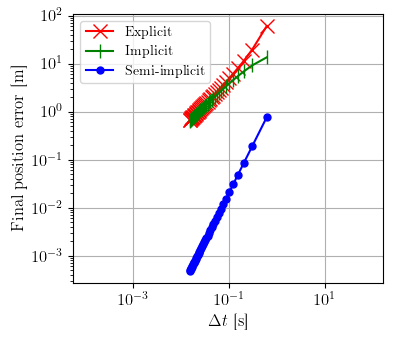

In [14]:
%matplotlib inline
def calculate_errors(dataset):
    position_error = np.zeros(nsimul)
    energy_error = np.zeros(nsimul)

    for i, (file, params) in enumerate(dataset):
        data = np.loadtxt(path + file)
        t, xx, yy, vx, vy, En = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5]
        position_error[i] = np.linalg.norm((xx[-1] - x_th(t[-1]), yy[-1] - y_th(t[-1])))
        energy_error[i] = np.max(En) - np.min(En)
    return position_error, energy_error

p1, e1 = calculate_errors(explicit)
p2, e2 = calculate_errors(implicit)
p3, e3 = calculate_errors(semi_implicit)
plt.loglog(dt, p1, 'rx-', label='Explicit')
plt.loglog(dt, p2, 'g|-', label='Implicit')
plt.loglog(dt, p3, 'b.-', label='Semi-implicit')

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Final position error [m]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend()
plt.axis('equal')
plt.savefig(export_path + 'nograv_numeric_convergence_all.pdf')

## Energy error

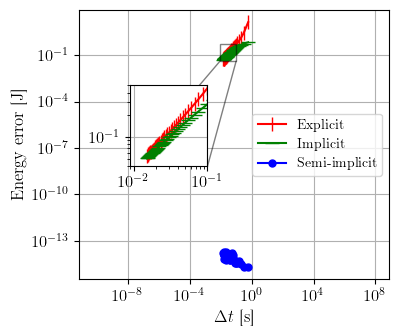

In [15]:
%matplotlib inline
plt.loglog(dt, e1, 'r|-', label='Explicit')
plt.loglog(dt, e2, 'g_-', label='Implicit')
plt.loglog(dt, e3, 'b.-', label='Semi-implicit')

x1, x2, y1, y2 = 9e-3, 1e-1, 4e-2, 5e-1
axins = plt.gca().inset_axes(
    [0.14, 0.42, 0.3, 0.3],
    xlim=(x1, x2), ylim=(y1, y2),
)
axins.loglog(dt, e1, 'r|-', label='Explicit')
axins.plot(dt, e2, 'g_-', label='Implicit')
axins.grid()
axins.set_aspect('equal')
plt.gca().indicate_inset_zoom(axins, edgecolor="black")

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Energy error [J]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend(loc='center right')
plt.axis('equal')
plt.savefig(export_path + 'nograv_energy_error_all.pdf')

## Energy steps

In [47]:
%matplotlib inline

def fit_func(xdata, gamma):
    return 0.748151036383996-1 + np.exp(gamma * xdata)

def plot_energies(dataset, **kwargs):
    for i, (file, params) in enumerate(dataset):
        if params['nsteps'] not in [60, 200, 400, 1600, 4000]:
            continue
        data = np.loadtxt(path + file)
        t, En1 = data[:, 0], data[:, 5]
        plt.plot(t, En1, label=f"$n_\\textrm{{steps}}={params['nsteps']}$", **kwargs)
        things = sc.optimize.curve_fit(fit_func, t, En1)
        print(f"nsteps={params['nsteps']}, gamma={things[0][0]:.4f}")
        # plt.plot(t, fit_func(t, *things[0]), **kwargs)

    plt.xlabel(r'$t$ [s]')
    plt.ylabel(r'$E_\textrm{mec}$ [J]')
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.legend()

nsteps=200, gamma=0.0203
nsteps=400, gamma=0.0096
nsteps=1600, gamma=0.0023
nsteps=4000, gamma=0.0009


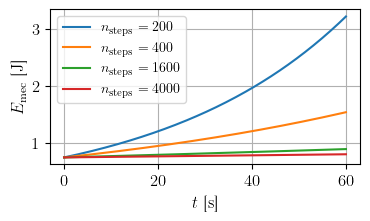

In [57]:
plt.close()
plot_energies(explicit)
# plt.yscale('log')
ratio = 0.5
xleft, xright = plt.xlim()
ybottom, ytop = plt.ylim()
plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
plt.savefig(export_path + 'nograv_energy_explicit.pdf')
plt.show()

nsteps=200, gamma=-0.0146
nsteps=400, gamma=-0.0081
nsteps=1600, gamma=-0.0022
nsteps=4000, gamma=-0.0009


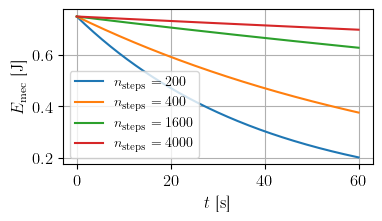

In [56]:
plot_energies(implicit)
# plt.yscale('log')
ratio = 0.5
xleft, xright = plt.xlim()
ybottom, ytop = plt.ylim()
plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
plt.savefig(export_path + 'nograv_energy_implicit.pdf')
plt.show()

/tmp/ipykernel_29918/2774898496.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  things = sc.optimize.curve_fit(fit_func, t, En1)


nsteps=200, gamma=0.0000
nsteps=400, gamma=0.0000
nsteps=1600, gamma=0.0000
nsteps=4000, gamma=0.0000


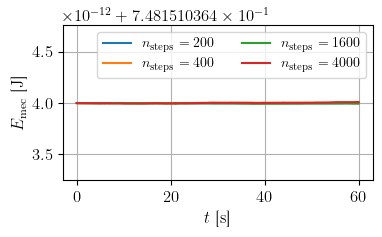

In [54]:
plot_energies(semi_implicit)
ratio = 0.5
xleft, xright = plt.xlim()
ybottom, ytop = plt.ylim()
plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
plt.legend(ncols=2)
plt.savefig(export_path + 'nograv_energy_semiimplicit.pdf')
plt.show()

# plot_energies(explicit, c='r')
# plot_energies(implicit, c='g')
# plot_energies(semi_implicit, c='b')